# CH4

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
from sklearn.datasets import fetch_openml
X= 2* np.random.rand(100,1)
y= 4+3*X+np.random.randn(100,1)

In [19]:
X_b= np.c_[np.ones((100,1)), X]
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best #잡음으로 인해 4,3이 정확히 나오지 않음

array([[3.98581562],
       [2.92959339]])

In [20]:
#예측해보자
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.98581562],
       [9.8450024 ]])

(0.0, 2.0, 0.0, 15.0)

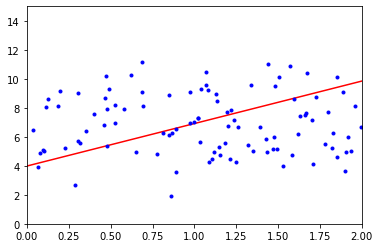

In [21]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,Y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ #편향과 가중치
lin_reg.predict(X_new)

LinearRegression()

(array([3.98581562]), array([[2.92959339]]))

array([[3.98581562],
       [9.8450024 ]])

In [23]:
theta_best_svd, residuals, ranks, s= np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.98581562],
       [2.92959339]])

In [24]:
np.linalg.pinv(X_b).dot(y) #유사역행렬을 직접 구한 결과

array([[3.98581562],
       [2.92959339]])

In [28]:
eta=1 #학습률
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients= 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta= theta- eta*gradients

<ipython-input-28-9fe078e6f98f>:9: RuntimeWarning: invalid value encountered in subtract
  theta= theta- eta*gradients


In [30]:
theta ????

array([[nan],
       [nan]])

In [32]:
#간단한 학습스케줄을 사용한 확률적 경사 하강법
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터
def learning_schedule(t ):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # 무작위 초기화
for epoch in range (n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[ random_index : random_index+1]
        yi = y[ random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [33]:
theta

array([[3.97326892],
       [2.86051671]])

In [34]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y. ravel ())
sgd_reg.intercept_, sgd_reg.coef_

SGDRegressor(eta0=0.1, penalty=None)

(array([3.97312346]), array([2.97444677]))

In [ ]:
#다항회귀

In [35]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) #원래: 0.5x^2+1.0x+2.0+가우시안 잡음

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree= 2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-2.97028006])

array([-2.97028006,  8.82256363])

In [37]:
lin_reg = LinearRegression()
lin_reg.fit (X_poly, y)
lin_reg.intercept_, lin_reg.coef_ #예측: 0.48x^2+1.10x+2.01

LinearRegression()

(array([2.00800287]), array([[1.09838656, 0.48117159]]))

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves (model, X, y):
    X_train, X_val, y_train, y_val = train_test_split (X, y, test_size=0.2 )
    train_errors , val_errors= [] , []
    for m in range (1, len (X_train )):
        model.fit(X_train [ :m], y_train [:m] )
        y_train_predict = model.predict(X_train[ :m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[ :m], y_train_predict ))
        val_errors.append(mean_squared_error(y_val, y_val_predict ))
    plt.plot(np.sqrt(train_errors ), "r-+", linewidth=2, label = " 훈련 세트" )
    plt.plot(np.sqrt(val_errors ), "b-", linewidth=3, label=" 검증 세트" )

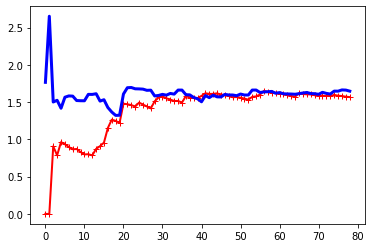

In [42]:
lin_reg = LinearRegression ()
plot_learning_curves (lin_reg, X, y)

## 릿지

In [44]:
#정규방정식을 시용한 릿지 회귀를 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge (alpha=1 , solver="cholesky" )
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

Ridge(alpha=1, solver='cholesky')

array([[5.26830715]])

In [48]:
#획률적 경사 하강법을 시용했을 때
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

SGDRegressor()

array([5.25695104])

## 라쏘

In [49]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit (X, y)
lasso_reg.predict([[ 1.5]])

Lasso(alpha=0.1)

array([5.22606851])

In [50]:
#획률적 경사 하강법을 시용했을 때
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

SGDRegressor(penalty='l1')

array([5.24187623])

## 엘라스틱넷

In [52]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


ElasticNet(alpha=0.1)

array([5.22454639])

In [ ]:
# 조기종료

In [ ]:
#

In [53]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [54]:
X = iris [ "data" ][: , 3:] # 꽃잎의 너비
y = (iris [ "target" ] == 2).astype(np.int) # iris verginaica면 1 그렇지 않으면 0

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression ()
log_reg.fit (X, y)

LogisticRegression()

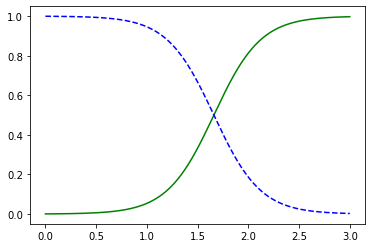

In [56]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[: , 1], "g-" , label="lris virginica" )
plt.plot(X_new, y_proba[ :, 0], "b--" , label="Not lris virginica" )

In [59]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [ ]:
#소프트맥스 회귀

In [60]:
X=iris["data"][:,(2,3)]
y=iris["target"]
softmax_reg =LogisticRegression(multi_class="multinomial" , solver="lbfgs", C =10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [61]:
softmax_reg.predict( [[5, 2]])
softmax_reg.predict_proba( [[5, 2]])

array([2])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])